# 1. Generación de datos sintéticos para algoritmos no supervisados

El propósito de este curso es ofrecer una guía sobre algunos modelos de aprendizaje de máquinas (ML, por sus siglas en inglés), específicamente en la rama del aprendizaje no supervisado (modelos de clustering o agrupamiento). Antes de implementar estos modelos, es necesario contar con datos que nos permitan experimentar una vez que los modelos de agrupamiento estén en funcionamiento.

En esta sección, proporcionaremos una guía para crear datos sintéticos, desarrollando nuestro propio marco básico que utilizaremos en secciones posteriores. Además, exploraremos otro Framework especializado en ML, el cual provee clases y métodos para generar ciertos tipos de datos de prueba.

En este primer punto se importan las librerias necesarias para el desarrollo de esta seción.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

<small>
Si genera un entorno virtual con pip para seguir este curso, descargue el archivo requirements.txt y ejecute el siguiente comando:

`pip3 install -r requirements.txt`

En caso de no estar usando un entorno virtual con pip, omita esta información.

</small>

## 1.1 Generación de datos sintéticos añadiendo ruido a diferentes puntos en el espacio

### 1.1.1  Generar ruido alrededor de un punto en el espacio (Primera forma)

1. Generarmos la coordenadas en $x$ y $y$ del purnto

In [2]:
x_point = 2
y_point = 3

2. Indicamos la cantidad de puntos que se generarán y cuán dispersos estarán los puntos alrededor de nuestro punto central.

In [3]:
num_points = 1000
sigma = 0.5

3. El método `np.random.normal()` permitirá generar un ruido gaussiano. Los parámetros anteriormente generados son los parámetros a ingresar en esta función.

In [4]:
x_noise = np.random.normal(loc=x_point, scale=sigma, size=num_points)
y_noise = np.random.normal(loc=y_point, scale=sigma, size=num_points)

4. Visualicemos <rbl>
 
Una forma de visualizar datos es utilizando el método `plt.scatter()` de Matplotlib, el cual admite algunos parámetros:

`
plt.scatter(x=coordenada_en_x,
            y=coordenada_en_y,
            c=color,
            alpha=transparencia_de_los_puntos,
            label=etiqueta_leyenda)
`

Para una mejor visualización y entendimiento de los datos, se pueden añadir los siguientes elementos:

- `plt.title()`: Para ingresar el título de la gráfica.
- `plt.xlabel()`: Para etiquetar el eje X.
- `plt.ylabel()`: Para etiquetar el eje Y.
- `plt.legend()`: Para generar la leyenda.

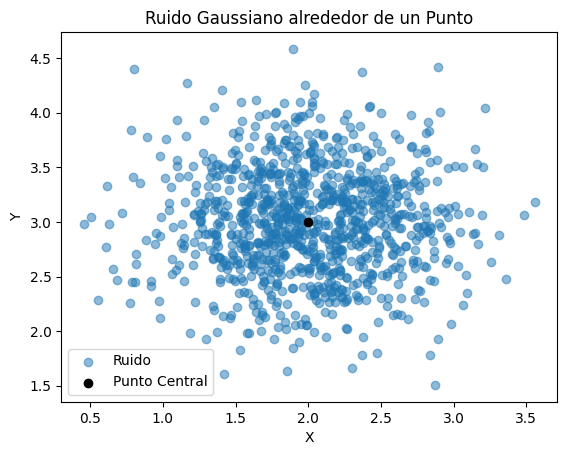

In [5]:
plt.scatter(x_noise, y_noise, alpha=0.5, label='Ruido')
plt.scatter(x_point, y_point, c='black', label='Punto Central')
plt.title('Ruido Gaussiano alrededor de un Punto')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### 1.1.2 Generar puntos alrededor de un punto en el espacio (Segunda forma)

1. Generamos un arreglo con la coordenada del punto. En este caso, tenemos `np.array([coorednada_x,coordenada_y])`.

In [6]:
point = np.array([3,3])

2. Asignamos la dispersión de los puntos.

In [7]:
sigma = 0.5

3. Creamos una tupla que contenga el tamaño de la matriz en filas y columnas.

`(cantidad de puntos, dimensión (x,y))`

In [8]:
size_data = (1000, 2)

4. Generamos los puntos

In [9]:
points_noise = np.random.normal(loc=point, scale=sigma, size=size_data)

si usamos el atributo `shape` podremos ver la forma del arreglo generado con nombre `points_noise`. Este debe coincidir con la forma asignada en la tupla.

In [10]:
points_noise.shape

(1000, 2)

5. Visualicemos

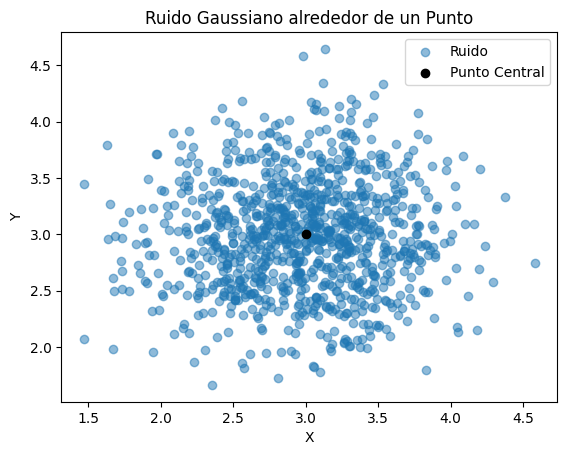

In [11]:
plt.scatter(points_noise[:,0], points_noise[:,1], alpha=0.5, label='Ruido')
plt.scatter(point[0], point[1], c='black', label='Punto Central')
plt.title('Ruido Gaussiano alrededor de un Punto')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### 1.1.3 Generar ruido alrededor de varios puntos (Primera forma)

1. Asignamos las coordenadas en $x$ y $y$ según la cantidad de puntos a los cuales se les añadirá el ruido, y siguiendo con la dimensión 
$2×2$, podríamos representarlo de la siguiente manera:

`np.array([[x0,y0],[x1,y1],...,[xn,yn]])`

In [12]:
coor_points = np.array([[3,3], 
                        [6,6],
                        [10,9]])

2. Asignamos la dispersión de los puntos

In [13]:
sigma = 0.5

3. Asignamos la cantidad de puntos que tendrán alrededor cada uno de los puntos generados anteriormente. 

In [14]:
num_points = 100

4. Generamos el ruido alrededor de los puntos 

In [15]:
x_noise_all = []
y_noise_all = []

for x,y in coor_points:
    x_noise = np.random.normal(loc=x, scale=sigma, size = num_points)
    y_noise = np.random.normal(loc=y, scale=sigma, size = num_points)
    x_noise_all.extend(x_noise)
    y_noise_all.extend(y_noise)

5. Visualicemos

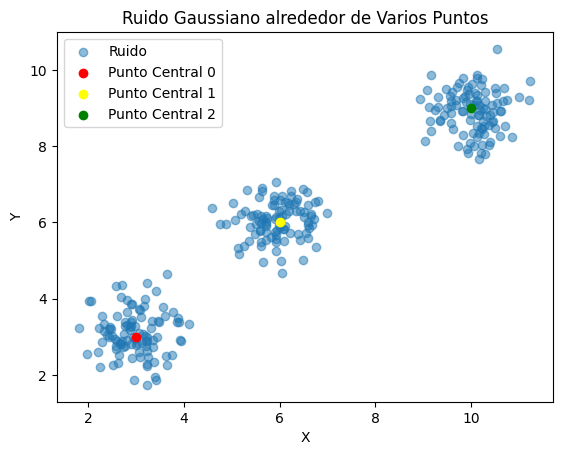

In [16]:
list_color = ['red', 'yellow', 'green']

plt.scatter(x_noise_all, y_noise_all, alpha=0.5, label='Ruido')
for i, (x_center, y_center) in enumerate(coor_points):

    plt.scatter(x_center, y_center, c=list_color[i], label = f'Punto Central {i}')

plt.title('Ruido Gaussiano alrededor de Varios Puntos')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### 1.1.4 Generar ruido alrededor de varios puntos (Segunda forma) 

1. Generamos números aleatorios con el método de numpy `np.random.uniform()`. Este método nos permite tener control sobre el rango en el cual los puntos serán generados, además de poder especificar la cantidad de puntos y su dimensión.

`np.random.uniform(low = limite inferior, high = limite superior, size=(cantidad de puntos, dimensión en tupla (x,y)))`

In [17]:
min_value = -10
max_value = 10

coor_points = np.random.uniform(low=min_value, high=max_value, size=(3, 2))

2. Asignamos la dispersión de los puntos

In [18]:
sigma = 1

3. Asignamos la cantidad de puntos que tendrán alrededor cada punto generado anteriormente

In [19]:
num_points = 100

4. Creamos una tupla que describa:

`(cantidad de puntos, cantidad de matrices que se generan, dimensión (x,y))` <rbl>

<small>
*Nota: la cantidad de matrices que se generan de coincidir con la cantidad de puntos generados aleatoriamente*
</small>

In [20]:
size_data = (100,3,2)

5. Generamos los puntos

In [21]:
points_noise = np.random.normal(loc=coor_points, scale=sigma, size = size_data)

6. Visualicemos

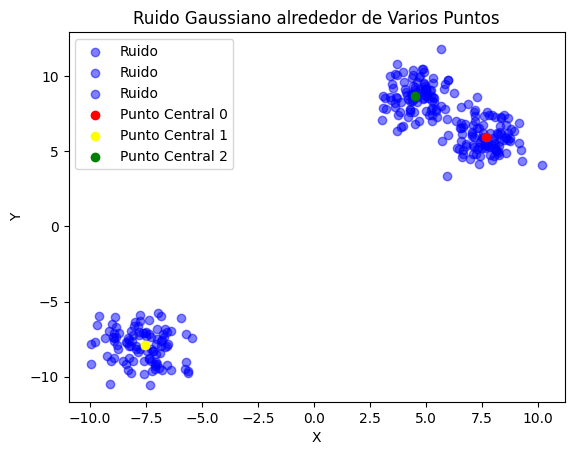

In [22]:
list_color = ['red', 'yellow', 'green']

for i in range(points_noise.shape[1]):
    plt.scatter(points_noise[:,i,0], points_noise[:,i,1], c = 'blue', alpha=0.5, label='Ruido')

for i, (x_center, y_center) in enumerate(coor_points):
    plt.scatter(x_center, y_center, c=list_color[i], label = f'Punto Central {i}')

plt.title('Ruido Gaussiano alrededor de Varios Puntos')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## 1.2 Generación de datos sintéticos a partir de funciones matemáticas

### 1.2.1 Circunferencias

Se pueden generar circunferencias utilizando las funciones trigonométricas seno y coseno. NumPy proporciona estas funciones como `np.sin()` y `np.cos()`. Para generar las coordenadas de la circunferencia, se utiliza `np.cos()` para las coordenadas en el eje $x$ y `np.sin()` para las coordenadas en el eje $y$. Es necesario especificar las coordenadas del centro del círculo y el radio.

#### Generación de datos sintéticos utilizando una circunferencia

1. Asignar el valor del radio

In [23]:
radio = 1

2. Centro del círculo `(x,y)`

In [24]:
centro = (0,0)

3. Generar un arreglo de puntos que será la entrada para las funciones `np.cos()` y `np.sin()`

Un método de NumPy que permite generar un arreglo de puntos es `np.linspace()`, cuyos parámetros son:

`np.linspace(start = valor_inicial, stop = valor_final, num = cantidad_puntos)`

In [25]:
valor_inicial = 0
valor_final = 2 * np.pi
cantidad_puntos = 1000

theta = np.linspace(valor_inicial, valor_final, cantidad_puntos)

4. Generar las coordenadas

In [26]:
x = centro[0] + (radio) * np.cos(theta)
y = centro[1] + (radio) * np.sin(theta)

5. Visualicemos

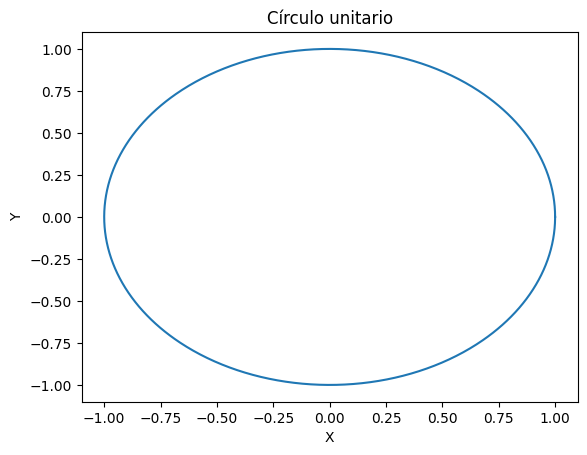

In [27]:
plt.plot(x,y)
plt.title('Círculo unitario')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

*Nota: Para obtener datos variados que sigan un patrón circular, es necesario añadir ruido en el borde del círculo.*

6. Generar ruido 

En este caso, utilizaremos la función vista anteriormente, `np.random.normal()`. Es importante tener en cuenta que en el parámetro `size` del método `np.random.normal()`, se debe asignar el mismo valor que se le asignó a la cantidad de puntos, es decir, `cantidad_puntos`. El parámetro `loc` se debe mantener en cero para respetar el radio asignado a la circunferencia en pasos anteriores. Si se modifica el valor del parámetro `loc`, la circunferencia no mantendrá el radio asignado previamente.

In [28]:
ruido = np.random.normal(loc=0, scale=0.1, size = cantidad_puntos)

7. Añadimos el ruido

In [29]:
x = centro[0] + (radio + ruido) * np.cos(theta)
y = centro[1] + (radio + ruido) * np.sin(theta)

Ahora visualicemos los datos obtenidos

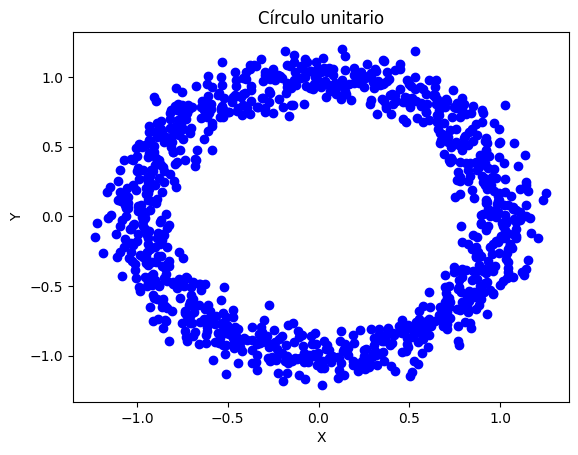

In [30]:
plt.scatter(x,y, c = 'blue')
plt.title('Círculo unitario')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Generación de datos sintéticos con varias circunferencias

1. Asignamos el centro de las circunferencias

In [31]:
centro = (0,0)

2. Generamos una lista con los radios

In [32]:
lista_radios = [1,2,3]

3. Asignamos la cantidad de puntos

In [33]:
cantidad_puntos = 1000

4. Generamos un arreglo de puntos que será la entrada para las funciones `np.cos()` y `np.sin()`

In [34]:
theta = np.linspace(valor_inicial, valor_final, cantidad_puntos)

5. Generamos ruido

In [35]:
ruido = np.random.normal(loc=0, scale=0.1, size = cantidad_puntos)

6. Añadimos ruido

En este punto se utilizará un nuevo método de NumPy llamado `np.column_stack()`. Será necesario para combinar las coordenadas $x$ y $y$ en un arreglo una vez que el ciclo `for` implementado haya finalizado.

In [36]:
list_x_noise = []
list_y_noise = []

for radio in lista_radios:
    x = centro[0] + (radio + ruido) * np.cos(theta)
    y = centro[1] + (radio + ruido) * np.sin(theta)

    list_x_noise.extend(x)
    list_y_noise.extend(y)

array_x_noise = np.array(list_x_noise)
array_y_noise = np.array(list_y_noise)

datos_circurferancia = np.column_stack((array_x_noise, array_y_noise))

7. Visualicemos

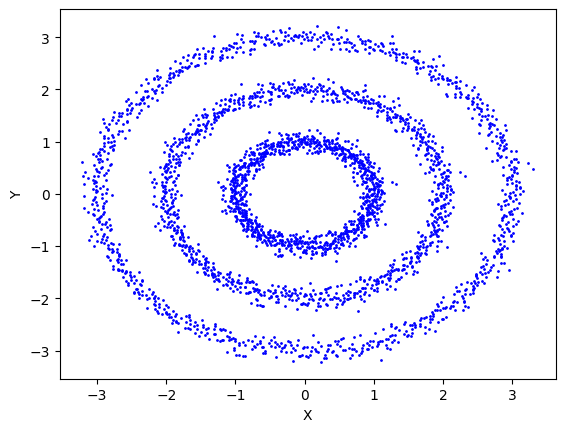

In [37]:
plt.scatter(datos_circurferancia[:,0],datos_circurferancia[:,1], c = 'blue', s = 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 1.2.2 Parábola y Recta

Al igual que se hizo con la circunferencia, es necesario primero crear funciones para la parábola ($ax^2 + c$) y la recta ($mx + b$), a las cuales se les añadirá ruido. En este punto, solo se enfocará en la creación de estas funciones, ya que los pasos restantes son similares a los vistos anteriormente.


#### Parábola $ax^2 + c $

In [38]:
x_cuadrado = lambda a, c, x: a * x**2 + c 

In [39]:
valor_inicial = -10
valor_final = 10

cantidad_puntos = 1000


x = np.linspace(valor_inicial, valor_final, cantidad_puntos)

In [40]:
y = x_cuadrado(1,0,x)

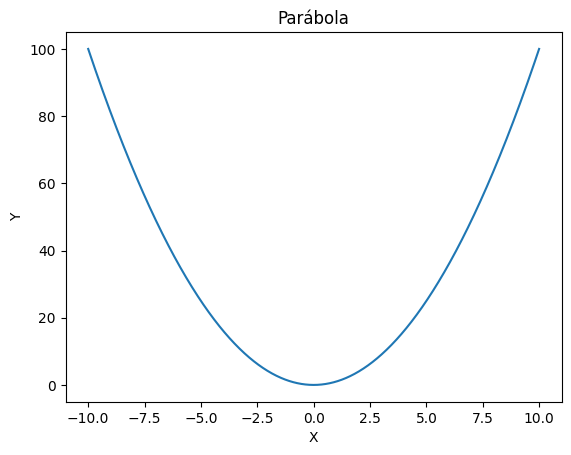

In [41]:
plt.plot(x,y)
plt.title('Parábola')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [42]:
ruido = np.random.normal(loc=0, scale=1, size = cantidad_puntos)

In [43]:
y_ruido = x_cuadrado(1,0,x) + ruido

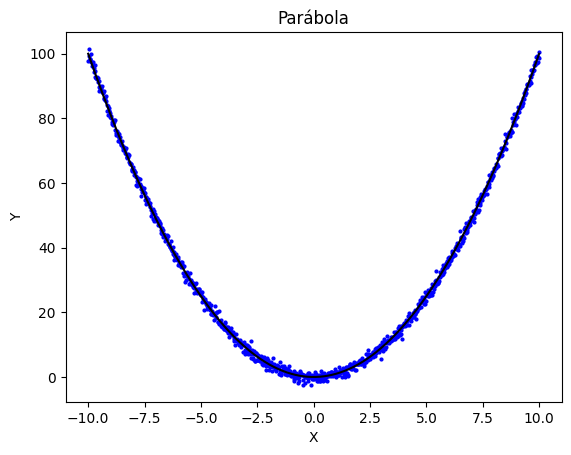

In [44]:
plt.scatter(x,y_ruido, c = 'blue', s = 4)
plt.plot(x,y, c = 'black')
plt.title('Parábola')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Ecuación de la Recta $mx+b$

In [45]:
recta = lambda m, b, x: m * x + b 

In [46]:
valor_inicial = -10
valor_final = 10

cantidad_puntos = 1000


x = np.linspace(valor_inicial, valor_final, cantidad_puntos)

In [47]:
y = recta(1,0,x)

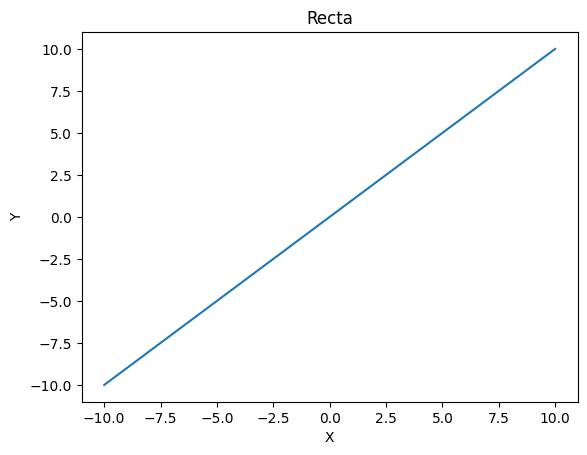

In [48]:
plt.plot(x,y)
plt.title('Recta')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [49]:
ruido = np.random.normal(loc=0, scale=1, size = cantidad_puntos)

In [50]:
y_ruido = recta(1,0,x) + ruido

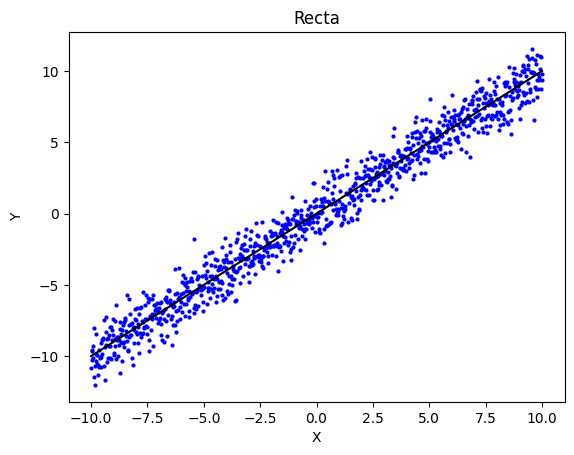

In [51]:
plt.scatter(x,y_ruido, c = 'blue', s = 4)
plt.plot(x,y, c = 'black')
plt.title('Recta')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## 1.3 Generar datos sintéticos a partir de la combinación de diferentes métodos

En este punto, podemos combinar varios métodos vistos anteriormente para generar datos sintéticos. Por ejemplo, podemos crear algo tan simple como una carita feliz.

In [52]:
parabola = lambda a, c, x: a * x**2 + c 

In [53]:
coor_points = np.array([[-2.5,25], 
                        [2.5,25]])

In [54]:
sigma = 0.5
size_data = (300, 2, 2)

ojos = np.random.normal(loc = coor_points, scale=sigma, size = size_data)

In [55]:
valor_inicial = -4
valor_final = 4

cantidad_puntos = 1000


x = np.linspace(valor_inicial, valor_final, cantidad_puntos)
ruido = np.random.normal(loc=0, scale=1, size = cantidad_puntos)

y_ruido = parabola(1,0,x) + ruido

boca = np.column_stack((x, y_ruido))

Es necesario unir en un arreglo los valores que generan los ojos y la boca en un solo arreglo. El método `np.vstack()` permitirá realizar esta tarea. Si miramos el tamaño del arreglo que forma los ojos, tenemos:

In [56]:
ojos.shape

(300, 2, 2)

La primera posición ``100`` representa la cantidad de filas de los arreglos, la segunda posición ``2`` indica la cantidad de arreglos, y la tercera posición ``2`` indica la cantidad de columnas que tienen los arreglos.

In [57]:
carita_feliz = np.vstack((ojos[:,0,:], ojos[:,1,:], boca))

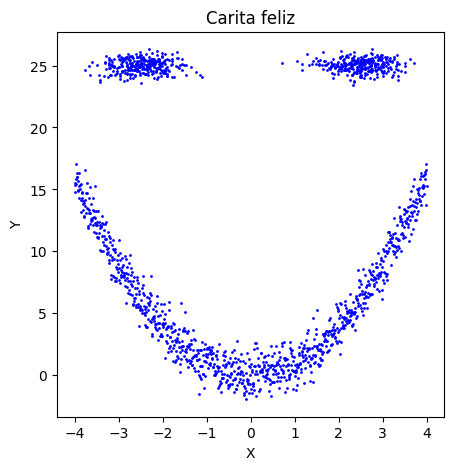

In [58]:
plt.figure(figsize = (5,5))
plt.scatter(carita_feliz[:,0],carita_feliz[:,1], c = 'blue', s = 1)
plt.title('Carita feliz')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## 1.4 Generar datos sintéticos a partir de librerías especializada

En esta sección, utilizaremos la librería especializada en Machine Learning (ML) llamada Scikit-learn. Esta biblioteca es de código abierto y gratuita. Scikit-learn ofrece una variedad de modelos de ML tanto supervisados como no supervisados, además de conjuntos de datos predefinidos para llevar a cabo experimentos.

### 1.4.1 Función `make_blobs`

Para utilizarlo, primero se debe importar la función ``make_blobs`` con la siguiente línea de código:

In [59]:
from sklearn.datasets import make_blobs

La función `make_blobs()` requiere algunos parámetros: 

`
make_blobs(n_samples = cantidad de puntos,
           centers = cantidad de grupos,
           n_features = dimensión de los datos,
           random_state = reproducibilidad de los datos)
`

La función `make_blobs()` retorna en la primera posición los datos, donde las características de los datos son las coordenadas en $x$ y $y$. En la segunda posición retorna las etiquetas de los datos.

In [60]:
caracteristicas, etiquetas = make_blobs(n_samples=150, centers=4, n_features=2, random_state= 42)

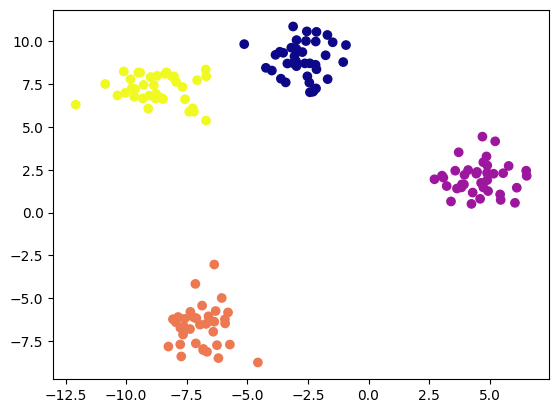

In [61]:
plt.scatter(caracteristicas[:,0], caracteristicas[:,1], c = etiquetas, cmap='plasma')
plt.show()

Si echamos un vistazo a la forma de las características obtenidas:

In [62]:
caracteristicas.shape

(150, 2)

La primera posición indica la cantidad de filas, en este caso `150` filas, y en la segunda posición se indica la cantidad de columnas, que son `2`. En otras palabras, tenemos `150` puntos cuyas características son 2 dimensiones en $x$ y $y$.

Ahora demos un vistazo a las etiquetas

In [63]:
etiquetas

array([0, 0, 3, 1, 2, 2, 0, 0, 2, 2, 3, 3, 1, 3, 2, 1, 3, 1, 1, 1, 0, 3,
       2, 3, 2, 3, 3, 0, 3, 1, 1, 0, 2, 3, 1, 1, 2, 3, 2, 0, 1, 3, 0, 0,
       2, 1, 0, 2, 0, 3, 1, 1, 1, 0, 0, 3, 1, 2, 3, 0, 3, 3, 2, 2, 2, 1,
       2, 2, 1, 1, 3, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 3, 0, 2, 1, 0, 1, 2,
       3, 1, 3, 1, 0, 3, 2, 1, 3, 3, 0, 1, 2, 2, 0, 0, 2, 0, 3, 1, 1, 3,
       2, 1, 1, 3, 3, 1, 3, 2, 3, 0, 3, 3, 1, 3, 0, 2, 3, 2, 1, 3, 0, 0,
       1, 2, 0, 2, 2, 2, 1, 3, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2])

En este caso, las etiquetas nos indican a qué grupo pertenece cada punto. Por ejemplo, nos dicen que el primer punto pertenece al grupo 0, el segundo punto también al grupo 0, el tercero al grupo 3, el cuarto al grupo 1, y así sucesivamente hasta llegar al último punto, que pertenece al grupo 2.

Ahora podemos entender la forma adecuada de generar los datos. El objetivo es que los datos tengan agrupaciones o patrones en el espacio, a los cuales llamaremos "grupos". En el caso de la carita feliz, tenemos tres grupos: el ojo izquierdo en un grupo, el ojo derecho en otro grupo, y la boca en el último grupo. Esto se puede extrapolar a otros conjuntos de datos que generemos; en cada uno de ellos se pueden apreciar diferentes grupos, y al final lo que queremos es que los modelos de agrupamiento puedan detectar estos grupos.

Aunque el método `make_blobs()` de Scikit-learn retorne las etiquetas de los datos, estas no serán necesarias en la experimentación con modelos de agrupamiento. Debido a que estos modelos son no supervisados, podemos prescindir de las etiquetas para realizar el proceso de agrupamiento.

Ahora hemos llegado al final de esta primera sección sobre generación de datos sintéticos para algoritmos no supervisados. Aun así, se dejan algunos retos al estudiante.

# Retos 

#### 1. Generar datos sintéticos combinando varias funciones, se pueden utilizar funciones nuevas o las ya vistas.

In [64]:
#Código

#### 2. Generar datos con las función de Scikit-learn `make_circles`.

*Nota: se recomeinta ver la documentasión https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html*

In [65]:
# Código